In [1]:
# Import necessary libraries and dependencies

import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

# Clean The Data

In [2]:
#Set the file paths for the CSVs

eve_data = Path("../CSVs/ORCL-SQ-NVDA.csv")

eren_data = Path("../CSVs/BABA-PFE-NFLX-CRM-GD.csv")

phil_data = Path("../CSVs/Phil_Stocks.csv")

In [3]:
# Read the data

eve_df = pd.read_csv(eve_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

eren_df = pd.read_csv(eren_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

phil_df = pd.read_csv(phil_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [4]:
#Concat the df's based on what we currently have and we will add Felipe's later

combined = pd.concat([eve_df, eren_df, phil_df], axis='columns', join='outer')

combined.head()

,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,HD,FB,MSFT,WMT
Date,,,,,,,,,,,,,
2015-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.74,117.81,92.07,45.57,64.98
2015-10-05,NaN,NaN,NaN,63.930000,27.822315,111.250000,75.269997,129.018661,93.46,119.20,94.01,46.63,65.87
2015-10-06,NaN,NaN,NaN,63.919998,27.248917,108.330002,74.419998,125.921211,93.37,118.68,92.80,46.75,65.68
2015-10-07,NaN,NaN,NaN,66.279999,27.664425,108.099998,75.000000,126.272095,94.24,119.65,92.40,46.80,66.36
2015-10-08,NaN,NaN,NaN,67.699997,27.498219,114.930000,75.089996,127.666481,95.57,121.06,92.47,47.45,66.88


In [5]:
#Dropping NAN's
combined_2 = combined.dropna()

combined_2.head()

,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,HD,FB,MSFT,WMT
Date,,,,,,,,,,,,,
2015-11-19,36.108597,13.07,30.458263,77.870003,27.049994,120.220001,80.639999,130.626297,99.63,126.86,106.26,53.94,60.70
2015-11-20,36.404728,12.85,30.722525,79.949997,26.957846,123.839996,80.989998,130.896194,100.49,130.21,107.32,54.19,60.07
2015-11-23,36.219639,12.12,30.262524,81.309998,26.245783,125.029999,80.779999,130.077530,99.94,132.50,106.95,54.19,60.26
2015-11-24,36.515770,12.02,30.507206,80.860001,26.781923,123.309998,80.389999,130.923172,99.26,133.60,105.74,54.25,59.92
2015-11-25,36.330700,11.90,30.468054,81.709999,27.535873,124.160004,80.410004,130.608292,99.09,134.65,105.41,53.69,60.24


In [6]:
#Creating the file path and reading in Felipe's stock picks

felipe_data = Path("../CSVs/Felipe_Stocks_Final.csv")

felipe_df = pd.read_csv(felipe_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [7]:
#Cleaning Felipe's data
felipe_df.dropna(inplace=True)

In [8]:
#Setting the index 

felipe_df.index=felipe_df.index.date
felipe_df

,VZ,MCD,Close,CLX,COST,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,AMT,NEE
2015-10-01,42.96,116.07,57.48,115.38,144.56,77.93,295.92,68.59,93.17,116.61,140.80,98.58,98.44,90.13,88.38,96.55
2015-10-02,42.84,114.76,58.08,116.93,145.86,79.48,303.36,68.74,93.93,118.83,143.20,99.38,99.39,92.66,89.74,98.54
2015-10-05,44.00,115.91,59.04,118.38,148.07,81.82,313.61,70.75,94.76,119.65,146.32,101.53,101.62,94.59,93.46,100.72
2015-10-06,44.06,114.45,58.69,118.35,148.41,82.58,312.73,70.63,93.42,116.05,145.79,101.43,101.50,93.40,93.37,99.85
2015-10-07,43.85,115.25,58.78,119.00,147.96,83.24,320.64,71.98,94.98,116.43,147.54,102.24,102.62,94.31,94.24,99.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,59.39,235.28,84.30,211.51,342.58,52.88,547.81,125.22,145.66,302.50,160.27,166.12,214.63,120.25,239.81,281.82
2020-09-28,59.36,224.73,86.07,211.97,349.62,53.98,558.65,128.55,147.11,303.23,161.66,168.90,222.78,121.74,240.00,284.14
2020-09-29,59.24,217.84,84.80,210.41,352.14,52.19,554.80,127.49,147.06,304.15,159.81,168.50,224.08,120.33,240.12,283.12
2020-09-30,59.49,229.94,85.92,210.17,355.00,51.84,563.55,128.22,148.88,311.77,160.18,166.63,225.99,122.08,241.73,277.56


In [9]:
#Fixing a column name for Felipe's picks 

column_names = felipe_df.columns.values
column_names[2] = 'SBUX'
felipe_df.columns = column_names

felipe_df

,VZ,MCD,SBUX,CLX,COST,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,AMT,NEE
2015-10-01,42.96,116.07,57.48,115.38,144.56,77.93,295.92,68.59,93.17,116.61,140.80,98.58,98.44,90.13,88.38,96.55
2015-10-02,42.84,114.76,58.08,116.93,145.86,79.48,303.36,68.74,93.93,118.83,143.20,99.38,99.39,92.66,89.74,98.54
2015-10-05,44.00,115.91,59.04,118.38,148.07,81.82,313.61,70.75,94.76,119.65,146.32,101.53,101.62,94.59,93.46,100.72
2015-10-06,44.06,114.45,58.69,118.35,148.41,82.58,312.73,70.63,93.42,116.05,145.79,101.43,101.50,93.40,93.37,99.85
2015-10-07,43.85,115.25,58.78,119.00,147.96,83.24,320.64,71.98,94.98,116.43,147.54,102.24,102.62,94.31,94.24,99.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,59.39,235.28,84.30,211.51,342.58,52.88,547.81,125.22,145.66,302.50,160.27,166.12,214.63,120.25,239.81,281.82
2020-09-28,59.36,224.73,86.07,211.97,349.62,53.98,558.65,128.55,147.11,303.23,161.66,168.90,222.78,121.74,240.00,284.14
2020-09-29,59.24,217.84,84.80,210.41,352.14,52.19,554.80,127.49,147.06,304.15,159.81,168.50,224.08,120.33,240.12,283.12
2020-09-30,59.49,229.94,85.92,210.17,355.00,51.84,563.55,128.22,148.88,311.77,160.18,166.63,225.99,122.08,241.73,277.56


In [10]:
# Combining all of our df's to create one master df from where we will decide which stocks we chose

combined_2 = pd.concat([eve_df, eren_df, phil_df, felipe_df], axis='columns', join='outer')
combined_2.dropna()

,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,HD,...,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,AMT,NEE
2015-11-19,36.108597,13.070000,30.458263,77.870003,27.049994,120.220001,80.639999,130.626297,99.63,126.86,...,359.09,76.38,102.49,110.63,158.38,104.10,107.28,103.37,99.63,100.99
2015-11-20,36.404728,12.850000,30.722525,79.949997,26.957846,123.839996,80.989998,130.896194,100.49,130.21,...,362.46,76.37,102.48,112.97,158.95,104.10,107.97,104.62,100.49,101.02
2015-11-23,36.219639,12.120000,30.262524,81.309998,26.245783,125.029999,80.779999,130.077530,99.94,132.50,...,363.25,76.15,102.77,112.16,158.65,103.59,107.84,105.47,99.94,100.49
2015-11-24,36.515770,12.020000,30.507206,80.860001,26.781923,123.309998,80.389999,130.923172,99.26,133.60,...,356.81,75.62,102.04,113.19,157.75,103.40,107.35,105.49,99.26,99.41
2015-11-25,36.330700,11.900000,30.468054,81.709999,27.535873,124.160004,80.410004,130.608292,99.09,134.65,...,360.62,76.01,101.96,114.41,157.63,103.49,107.10,106.46,99.09,98.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,59.799999,157.720001,514.950012,271.089996,36.049999,482.880005,242.740005,138.210007,239.81,268.55,...,547.81,125.22,145.66,302.50,160.27,166.12,214.63,120.25,239.81,281.82
2020-09-28,59.580002,160.759995,521.400024,276.010010,36.389999,490.649994,246.669998,140.919998,240.00,272.33,...,558.65,128.55,147.11,303.23,161.66,168.90,222.78,121.74,240.00,284.14
2020-09-29,59.470001,164.809998,529.030029,276.929993,36.169998,493.480011,247.449997,138.550003,240.12,272.11,...,554.80,127.49,147.06,304.15,159.81,168.50,224.08,120.33,240.12,283.12
2020-09-30,59.700001,162.550003,541.219971,293.980011,36.700001,500.029999,251.320007,138.429993,241.73,277.71,...,563.55,128.22,148.88,311.77,160.18,166.63,225.99,122.08,241.73,277.56


In [11]:
#Just a sanity check to see all the column names to ensure that we got everything

print(combined_2.columns)

Index(['ORCL', 'SQ', 'NVDA', 'BABA', 'PFE', 'NFLX', 'CRM', 'GD', 'AMT', 'HD',
       'FB', 'MSFT', 'WMT', 'VZ', 'MCD', 'SBUX', 'CLX', 'COST', 'PSX', 'BLK',
       'TROW', 'JNJ', 'UNH', 'MMM', 'UPS', 'ACN', 'PPG', 'AMT', 'NEE'],
      dtype='object')


# Inital Data Calculations of All the Potential Stocks for Our Portfolio

## Calculate Daily Returns

In [12]:
#Calculating the daily returns for each stock

portfolio_daily=combined_2.pct_change()

portfolio_daily.dropna()

,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,HD,...,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,AMT,NEE
2015-11-20,0.008201,-0.016832,0.008676,0.026711,-0.003407,0.030111,0.004340,0.002066,0.008632,0.026407,...,0.009385,-0.000131,-0.000098,0.021152,0.003599,0.000000,0.006432,0.012092,0.008632,0.000297
2015-11-23,-0.005084,-0.056809,-0.014973,0.017011,-0.026414,0.009609,-0.002593,-0.006254,-0.005473,0.017587,...,0.002180,-0.002881,0.002830,-0.007170,-0.001887,-0.004899,-0.001204,0.008125,-0.005473,-0.005246
2015-11-24,0.008176,-0.008251,0.008085,-0.005534,0.020428,-0.013757,-0.004828,0.006501,-0.006804,0.008302,...,-0.017729,-0.006960,-0.007103,0.009183,-0.005673,-0.001834,-0.004544,0.000190,-0.006804,-0.010747
2015-11-25,-0.005068,-0.009983,-0.001283,0.010512,0.028151,0.006893,0.000249,-0.002405,-0.001713,0.007859,...,0.010678,0.005157,-0.000784,0.010778,-0.000761,0.000870,-0.002329,0.009195,-0.001713,-0.005331
2015-11-27,-0.002038,0.012605,0.008352,-0.004039,-0.002434,0.010309,-0.005472,0.002617,0.005954,0.000668,...,-0.006184,-0.000789,0.004021,-0.000612,0.002284,0.006667,0.003361,-0.002348,0.005954,0.004956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,-0.003679,0.019275,0.012526,0.018149,0.009431,0.016091,0.016190,0.019608,0.000792,0.014076,...,0.019788,0.026593,0.009955,0.002413,0.008673,0.016735,0.037972,0.012391,0.000792,0.008232
2020-09-29,-0.001846,0.025193,0.014634,0.003333,-0.006046,0.005768,0.003162,-0.016818,0.000500,-0.000808,...,-0.006892,-0.008246,-0.000340,0.003034,-0.011444,-0.002368,0.005835,-0.011582,0.000500,-0.003590
2020-09-30,0.003867,-0.013713,0.023042,0.061568,0.014653,0.013273,0.015640,-0.000866,0.006705,0.020580,...,0.015771,0.005726,0.012376,0.025053,0.002315,-0.011098,0.008524,0.014543,0.006705,-0.019638
2020-10-01,-0.000335,0.036543,0.006208,-0.013368,-0.008992,0.054957,0.008475,-0.001517,0.001737,-0.000324,...,0.007737,-0.001404,-0.010478,0.004170,-0.008678,0.006121,-0.003584,-0.002457,0.001737,0.018735


## Calculating Cumulative Returns

In [13]:
#Calculating each stocks cumulative return

portfolio_cumulative = (portfolio_daily + 1).cumprod() -1 
portfolio_cumulative.dropna()

,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,HD,...,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,AMT,NEE
2015-11-20,0.008201,-0.016832,0.008676,0.250587,-0.031071,0.113169,0.075993,0.014552,0.119791,0.105254,...,0.224858,0.113428,0.099925,-0.031215,0.128906,0.055995,0.096810,0.160768,0.137022,0.046297
2015-11-23,0.003075,-0.072686,-0.006426,0.271860,-0.056664,0.123865,0.073203,0.008207,0.113662,0.124692,...,0.227528,0.110220,0.103037,-0.038161,0.126776,0.050822,0.095490,0.170199,0.130799,0.040808
2015-11-24,0.011276,-0.080337,0.001607,0.264821,-0.037394,0.108404,0.068022,0.014762,0.106084,0.134029,...,0.205765,0.102493,0.095202,-0.029329,0.120384,0.048894,0.090512,0.170421,0.123105,0.029622
2015-11-25,0.006151,-0.089518,0.000321,0.278117,-0.010295,0.116045,0.068288,0.012321,0.104190,0.142942,...,0.218640,0.108179,0.094344,-0.018866,0.119531,0.049807,0.087972,0.181183,0.121181,0.024133
2015-11-27,0.004101,-0.078041,0.008676,0.272955,-0.012704,0.127551,0.062442,0.014970,0.110764,0.143706,...,0.211104,0.107304,0.098744,-0.019467,0.122088,0.056807,0.091629,0.178409,0.127857,0.029208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,0.650023,11.299923,16.118508,3.317379,0.307943,3.410337,2.277136,0.092245,1.674393,1.311603,...,0.887841,0.874180,0.578942,1.600377,0.148153,0.713329,1.263104,0.350716,1.715547,1.942931
2020-09-29,0.646976,11.609793,16.369015,3.331769,0.300036,3.435775,2.287498,0.073876,1.675730,1.309736,...,0.874831,0.858726,0.578405,1.608267,0.135014,0.709272,1.276310,0.335072,1.716904,1.932367
2020-09-30,0.653346,11.436879,16.769233,3.598467,0.319085,3.494652,2.338913,0.072946,1.693671,1.357270,...,0.904400,0.869369,0.597939,1.673613,0.137642,0.690302,1.295713,0.354488,1.735121,1.874780
2020-10-01,0.652792,11.891355,16.879549,3.536993,0.307224,3.741663,2.367211,0.071318,1.698351,1.356506,...,0.919134,0.866744,0.581196,1.684761,0.127770,0.700649,1.287485,0.351159,1.739873,1.928638


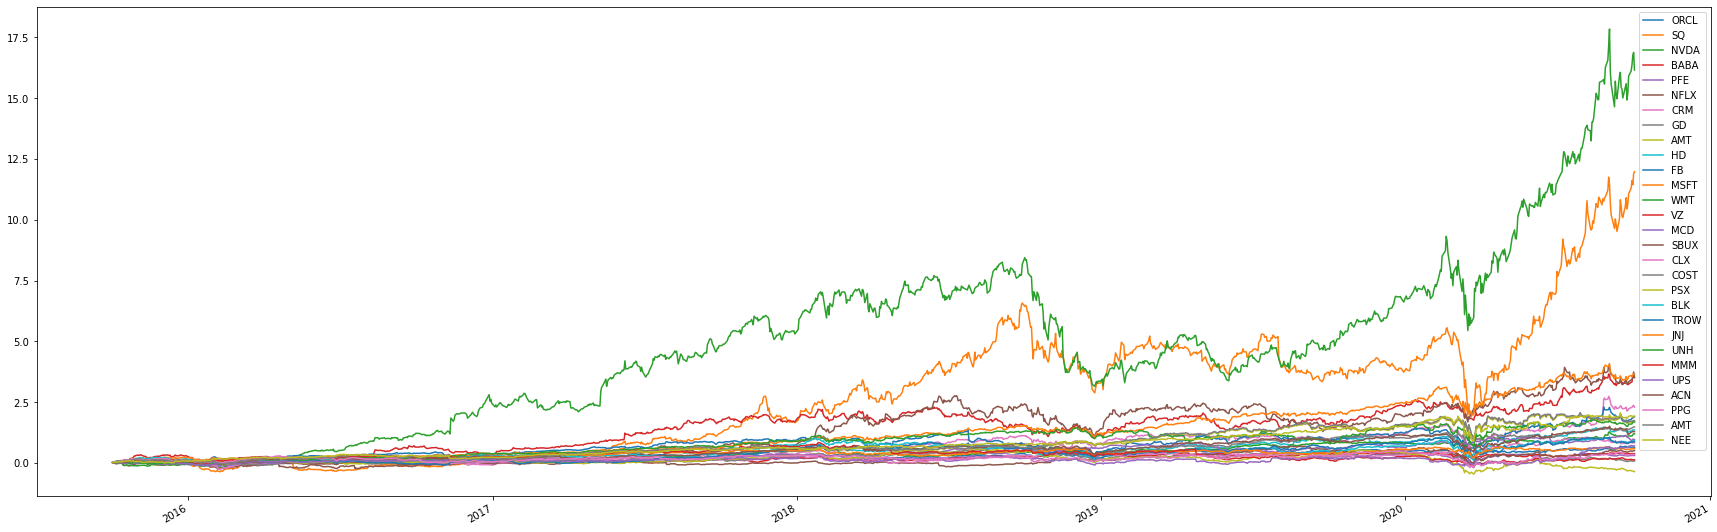

In [14]:
portfolio_cumulative.plot(figsize=(30,10));

## Correlation analysis of all potential stock choices

In [15]:
# Here we are deciphering the correlation of the stocks amongst themselves.
correlation_of_all_potential_stocks = portfolio_daily.corr()
correlation_of_all_potential_stocks

,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,HD,...,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,AMT,NEE
ORCL,1.000000,0.386744,0.441040,0.401531,0.489490,0.369383,0.519998,0.490317,0.449187,0.541530,...,0.574601,0.618375,0.499836,0.462228,0.493810,0.487802,0.591072,0.465568,0.449187,0.396957
SQ,0.386744,1.000000,0.497101,0.435190,0.266796,0.406201,0.522451,0.352647,0.308885,0.450279,...,0.431928,0.409611,0.242860,0.378159,0.319524,0.333834,0.459690,0.371524,0.308885,0.277866
NVDA,0.441040,0.497101,1.000000,0.511186,0.302716,0.434059,0.518649,0.380077,0.317052,0.498054,...,0.480133,0.445971,0.321436,0.409679,0.428520,0.394518,0.482080,0.381444,0.317052,0.273752
BABA,0.401531,0.435190,0.511186,1.000000,0.277702,0.418695,0.458691,0.353640,0.260417,0.363652,...,0.453907,0.409393,0.287651,0.319669,0.368989,0.345112,0.444501,0.384659,0.260417,0.164492
PFE,0.489490,0.266796,0.302716,0.277702,1.000000,0.241524,0.340086,0.465807,0.423415,0.465854,...,0.499860,0.528240,0.601188,0.506645,0.467451,0.418580,0.472509,0.392016,0.423415,0.401200
NFLX,0.369383,0.406201,0.434059,0.418695,0.241524,1.000000,0.505363,0.265991,0.221568,0.356067,...,0.339315,0.328485,0.227223,0.333898,0.265286,0.298567,0.378506,0.232731,0.221568,0.143194
CRM,0.519998,0.522451,0.518649,0.458691,0.340086,0.505363,1.000000,0.390874,0.385879,0.533370,...,0.515605,0.481745,0.353272,0.415288,0.381264,0.360945,0.570354,0.395594,0.385879,0.296409
GD,0.490317,0.352647,0.380077,0.353640,0.465807,0.265991,0.390874,1.000000,0.436078,0.559862,...,0.629273,0.636208,0.466839,0.505194,0.614054,0.491739,0.587317,0.581177,0.436078,0.421907
AMT,0.449187,0.308885,0.317052,0.260417,0.423415,0.221568,0.385879,0.436078,1.000000,0.489816,...,0.491120,0.455302,0.494270,0.457972,0.380347,0.363920,0.543790,0.409436,1.000000,0.634955
HD,0.541530,0.450279,0.498054,0.363652,0.465854,0.356067,0.533370,0.559862,0.489816,1.000000,...,0.637971,0.580171,0.455737,0.547612,0.540329,0.496744,0.653681,0.565035,0.489816,0.469551


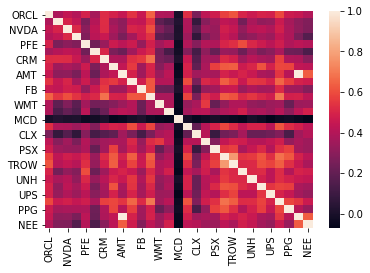

In [16]:
#We are using a heat map to quickly see if there are any noteable correlations that we should be concerned about.
sns.heatmap(correlation_of_all_potential_stocks);

# Clean the data for the S&P 500

In [20]:
# Reading csv files 
SP500_data = Path("../CSVs/SP500.csv")

raw_portfolio_data = Path("../CSVs/raw_portfolio.csv")
# Reading csv as df

SP500_df = pd.read_csv(SP500_data,index_col="Date", parse_dates=True, infer_datetime_format=True)
raw_portfolio_data = pd.read_csv(raw_portfolio_data, index_col=0, parse_dates=True, infer_datetime_format=True)
SP500_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-02,1921.770020,1951.359985,1893.699951,1951.359985,1951.359985,4378570000
2015-10-05,1954.329956,1989.170044,1954.329956,1987.050049,1987.050049,4334490000
2015-10-06,1986.630005,1991.619995,1971.989990,1979.920044,1979.920044,4202400000
2015-10-07,1982.339966,1999.310059,1976.439941,1995.829956,1995.829956,4666470000
2015-10-08,1994.010010,2016.500000,1987.530029,2013.430054,2013.430054,3939140000
...,...,...,...,...,...,...
2020-09-25,3236.659912,3306.879883,3228.439941,3298.459961,3298.459961,3792220000
2020-09-28,3333.899902,3360.739990,3332.909912,3351.600098,3351.600098,3946060000
2020-09-29,3350.919922,3357.919922,3327.540039,3335.469971,3335.469971,3651880000


In [21]:
#Dropping columns that are not needed
SP500_close_data= SP500_df.drop(columns=["Open","High","Low","Adj Close", "Volume"])

SP500_close_data

,Close
Date,
2015-10-02,1951.359985
2015-10-05,1987.050049
2015-10-06,1979.920044
2015-10-07,1995.829956
2015-10-08,2013.430054
...,...
2020-09-25,3298.459961
2020-09-28,3351.600098
2020-09-29,3335.469971


In [22]:
#Here we saved the output of the dataframe into a csv file for later uses 


    #SP500_close_data.to_csv(r'SP500_close_data.csv', index=True, header=True)

# Combining S&P data with the portfolio containing all our stock picks

In [23]:
#Now we will conacat the Newly Created SP500 DataFrame with the combined_2 Dataframe

SP500_and_general_stock_picks = pd.concat([SP500_close_data, raw_portfolio_data], axis='columns', join='outer')

SP500_and_general_stock_picks.dropna()

,Close,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
2015-11-19,2081.239990,36.108597,13.070000,30.458263,77.870003,27.049994,120.220001,80.639999,130.626297,99.63,...,92.38,359.09,76.38,102.49,110.63,158.38,104.10,107.28,103.37,100.99
2015-11-20,2089.169922,36.404728,12.850000,30.722525,79.949997,26.957846,123.839996,80.989998,130.896194,100.49,...,91.67,362.46,76.37,102.48,112.97,158.95,104.10,107.97,104.62,101.02
2015-11-23,2086.590088,36.219639,12.120000,30.262524,81.309998,26.245783,125.029999,80.779999,130.077530,99.94,...,92.17,363.25,76.15,102.77,112.16,158.65,103.59,107.84,105.47,100.49
2015-11-24,2089.139893,36.515770,12.020000,30.507206,80.860001,26.781923,123.309998,80.389999,130.923172,99.26,...,93.13,356.81,75.62,102.04,113.19,157.75,103.40,107.35,105.49,99.41
2015-11-25,2088.870117,36.330700,11.900000,30.468054,81.709999,27.535873,124.160004,80.410004,130.608292,99.09,...,92.77,360.62,76.01,101.96,114.41,157.63,103.49,107.10,106.46,98.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,3298.459961,59.799999,157.720001,514.950012,271.089996,36.049999,482.880005,242.740005,138.210007,239.81,...,52.88,547.81,125.22,145.66,302.50,160.27,166.12,214.63,120.25,281.82
2020-09-28,3351.600098,59.580002,160.759995,521.400024,276.010010,36.389999,490.649994,246.669998,140.919998,240.00,...,53.98,558.65,128.55,147.11,303.23,161.66,168.90,222.78,121.74,284.14
2020-09-29,3335.469971,59.470001,164.809998,529.030029,276.929993,36.169998,493.480011,247.449997,138.550003,240.12,...,52.19,554.80,127.49,147.06,304.15,159.81,168.50,224.08,120.33,283.12
2020-09-30,3363.000000,59.700001,162.550003,541.219971,293.980011,36.700001,500.029999,251.320007,138.429993,241.73,...,51.84,563.55,128.22,148.88,311.77,160.18,166.63,225.99,122.08,277.56


In [24]:
#Fixing the df column so that it reads SP500 instead of Close
column_names = SP500_and_general_stock_picks.columns.values
column_names[0] = 'SP500'
SP500_and_general_stock_picks.columns = column_names


SP500_and_general_stock_picks.dropna(inplace=True)

SP500_and_general_stock_picks

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
2015-11-19,2081.239990,36.108597,13.070000,30.458263,77.870003,27.049994,120.220001,80.639999,130.626297,99.63,...,92.38,359.09,76.38,102.49,110.63,158.38,104.10,107.28,103.37,100.99
2015-11-20,2089.169922,36.404728,12.850000,30.722525,79.949997,26.957846,123.839996,80.989998,130.896194,100.49,...,91.67,362.46,76.37,102.48,112.97,158.95,104.10,107.97,104.62,101.02
2015-11-23,2086.590088,36.219639,12.120000,30.262524,81.309998,26.245783,125.029999,80.779999,130.077530,99.94,...,92.17,363.25,76.15,102.77,112.16,158.65,103.59,107.84,105.47,100.49
2015-11-24,2089.139893,36.515770,12.020000,30.507206,80.860001,26.781923,123.309998,80.389999,130.923172,99.26,...,93.13,356.81,75.62,102.04,113.19,157.75,103.40,107.35,105.49,99.41
2015-11-25,2088.870117,36.330700,11.900000,30.468054,81.709999,27.535873,124.160004,80.410004,130.608292,99.09,...,92.77,360.62,76.01,101.96,114.41,157.63,103.49,107.10,106.46,98.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,3298.459961,59.799999,157.720001,514.950012,271.089996,36.049999,482.880005,242.740005,138.210007,239.81,...,52.88,547.81,125.22,145.66,302.50,160.27,166.12,214.63,120.25,281.82
2020-09-28,3351.600098,59.580002,160.759995,521.400024,276.010010,36.389999,490.649994,246.669998,140.919998,240.00,...,53.98,558.65,128.55,147.11,303.23,161.66,168.90,222.78,121.74,284.14
2020-09-29,3335.469971,59.470001,164.809998,529.030029,276.929993,36.169998,493.480011,247.449997,138.550003,240.12,...,52.19,554.80,127.49,147.06,304.15,159.81,168.50,224.08,120.33,283.12
2020-09-30,3363.000000,59.700001,162.550003,541.219971,293.980011,36.700001,500.029999,251.320007,138.429993,241.73,...,51.84,563.55,128.22,148.88,311.77,160.18,166.63,225.99,122.08,277.56


# General Calculations of the newly created DataFrame

## Calculating Daily Returns

In [25]:
#Calculating the % daily change of the SP500 + our stock picks
daily_returns_of_SP500_general_stock_picks = SP500_and_general_stock_picks.pct_change()
daily_returns_of_SP500_general_stock_picks.head()

daily_returns_of_SP500_general_stock_picks.dropna(inplace=True)

daily_returns_of_SP500_general_stock_picks

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
2015-11-20,0.003810,0.008201,-0.016832,0.008676,0.026711,-0.003407,0.030111,0.004340,0.002066,0.008632,...,-0.007686,0.009385,-0.000131,-0.000098,0.021152,0.003599,0.000000,0.006432,0.012092,0.000297
2015-11-23,-0.001235,-0.005084,-0.056809,-0.014973,0.017011,-0.026414,0.009609,-0.002593,-0.006254,-0.005473,...,0.005454,0.002180,-0.002881,0.002830,-0.007170,-0.001887,-0.004899,-0.001204,0.008125,-0.005246
2015-11-24,0.001222,0.008176,-0.008251,0.008085,-0.005534,0.020428,-0.013757,-0.004828,0.006501,-0.006804,...,0.010416,-0.017729,-0.006960,-0.007103,0.009183,-0.005673,-0.001834,-0.004544,0.000190,-0.010747
2015-11-25,-0.000129,-0.005068,-0.009983,-0.001283,0.010512,0.028151,0.006893,0.000249,-0.002405,-0.001713,...,-0.003866,0.010678,0.005157,-0.000784,0.010778,-0.000761,0.000870,-0.002329,0.009195,-0.005331
2015-11-27,0.000594,-0.002038,0.012605,0.008352,-0.004039,-0.002434,0.010309,-0.005472,0.002617,0.005954,...,-0.000108,-0.006184,-0.000789,0.004021,-0.000612,0.002284,0.006667,0.003361,-0.002348,0.004956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,0.015977,0.008432,0.035520,0.042578,0.005042,0.008110,0.020715,0.021848,0.009569,0.015370,...,0.000568,0.023848,0.014502,0.006843,0.033623,-0.000935,0.035596,0.000979,0.010929,0.015421
2020-09-28,0.016111,-0.003679,0.019275,0.012526,0.018149,0.009431,0.016091,0.016190,0.019608,0.000792,...,0.020802,0.019788,0.026593,0.009955,0.002413,0.008673,0.016735,0.037972,0.012391,0.008232
2020-09-29,-0.004813,-0.001846,0.025193,0.014634,0.003333,-0.006046,0.005768,0.003162,-0.016818,0.000500,...,-0.033160,-0.006892,-0.008246,-0.000340,0.003034,-0.011444,-0.002368,0.005835,-0.011582,-0.003590
2020-09-30,0.008254,0.003867,-0.013713,0.023042,0.061568,0.014653,0.013273,0.015640,-0.000866,0.006705,...,-0.006706,0.015771,0.005726,0.012376,0.025053,0.002315,-0.011098,0.008524,0.014543,-0.019638


In [26]:
for col in daily_returns_of_SP500_general_stock_picks.columns: 
    print(col)

SP500
ORCL
SQ
NVDA
BABA
PFE
NFLX
CRM
GD
AMT
HD
FB
MSFT
WMT
VZ
MCD
SBUX
CLX
COST
PSX
BLK
TROW
JNJ
UNH
MMM
UPS
ACN
PPG
NEE


## Calculating Beta for each stock 

In [27]:
#Calculating covariance of the our stock portfolio of daily returns

ORCL_covariance = daily_returns_of_SP500_general_stock_picks['ORCL'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
SQ_covariance = daily_returns_of_SP500_general_stock_picks['SQ'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
NVDA_covariance = daily_returns_of_SP500_general_stock_picks['NVDA'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
BABA_covariance = daily_returns_of_SP500_general_stock_picks['BABA'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
PFE_covariance = daily_returns_of_SP500_general_stock_picks['PFE'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
NFLX_covariance = daily_returns_of_SP500_general_stock_picks['NFLX'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
CRM_covariance = daily_returns_of_SP500_general_stock_picks['CRM'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
GD_covariance = daily_returns_of_SP500_general_stock_picks['GD'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
AMT_covariance = daily_returns_of_SP500_general_stock_picks['AMT'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
HD_covariance = daily_returns_of_SP500_general_stock_picks['HD'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
FB_covariance = daily_returns_of_SP500_general_stock_picks['FB'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
MSFT_covariance = daily_returns_of_SP500_general_stock_picks['MSFT'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
WMT_covariance = daily_returns_of_SP500_general_stock_picks['WMT'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
VZ_covariance = daily_returns_of_SP500_general_stock_picks['VZ'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
MCD_covariance = daily_returns_of_SP500_general_stock_picks['MCD'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
SBUX_covariance = daily_returns_of_SP500_general_stock_picks['SBUX'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
CLX_covariance = daily_returns_of_SP500_general_stock_picks['CLX'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
COST_covariance = daily_returns_of_SP500_general_stock_picks['COST'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
PSX_covariance = daily_returns_of_SP500_general_stock_picks['PSX'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
BLK_covariance = daily_returns_of_SP500_general_stock_picks['BLK'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
TROW_covariance = daily_returns_of_SP500_general_stock_picks['TROW'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
JNJ_covariance = daily_returns_of_SP500_general_stock_picks['JNJ'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
UNH_covariance = daily_returns_of_SP500_general_stock_picks['UNH'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
MMM_covariance = daily_returns_of_SP500_general_stock_picks['MMM'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
UPS_covariance = daily_returns_of_SP500_general_stock_picks['UPS'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
ACN_covariance = daily_returns_of_SP500_general_stock_picks['ACN'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
PPG_covariance = daily_returns_of_SP500_general_stock_picks['PPG'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])
NEE_covariance = daily_returns_of_SP500_general_stock_picks['NEE'].cov(daily_returns_of_SP500_general_stock_picks['SP500'])

In [28]:
#calculating Variance of SP500

variance = daily_returns_of_SP500_general_stock_picks['SP500'].var()
variance


0.00014785817616144565

In [29]:
#Calculating covariance of stocks used to determine which stocks will stay in our portfolio and which will be dropped

ORCL_beta = ORCL_covariance / variance
SQ_beta = SQ_covariance / variance
BABA_beta = BABA_covariance / variance
PFE_beta = PFE_covariance / variance
NFLX_beta = NFLX_covariance / variance
CRM_beta = CRM_covariance / variance
GD_beta = GD_covariance / variance
AMT_beta = AMT_covariance / variance
HD_beta = HD_covariance / variance
FB_beta = FB_covariance / variance
MSFT_beta = MSFT_covariance / variance
WMT_beta = WMT_covariance / variance
VZ_beta = VZ_covariance / variance
MCD_beta = MCD_covariance / variance
SBUX_beta = SBUX_covariance / variance
CLX_beta = CLX_covariance / variance
COST_beta = COST_covariance / variance
PSX_beta = PSX_covariance / variance
BLK_beta = BLK_covariance / variance
TROW_beta = TROW_covariance / variance
JNJ_beta = JNJ_covariance / variance
UNH_beta = UNH_covariance / variance
MMM_beta = MMM_covariance / variance
UPS_beta = UPS_covariance / variance
ACN_beta = ACN_covariance / variance
PPG_beta = PPG_covariance / variance
NEE_beta = NEE_covariance / variance

In [30]:
#Sanity check of our Covariances by creating a dictionary to read the data

beta = {
  "ORCL": ORCL_beta,
  "SQ" : SQ_beta,
  "NVDA": ORCL_beta,
  "BABA": BABA_beta,
  "PFE": PFE_beta,
  "NFLX": NFLX_beta,
  "CRM": CRM_beta,
  "GD": GD_beta,
  "AMT": AMT_beta,
  "HD": HD_beta,
  "FB": FB_beta,
  "MSFT": MSFT_beta,
  "WMT": WMT_beta,
  "VZ": VZ_beta,
  "MCD": MCD_beta,
  "SBUX": SBUX_beta,
  "CLX": CLX_beta,
  "COST": COST_beta,
  "PSX": PSX_beta,
  "BLK": BLK_beta,
  "TROW": TROW_beta,
  "JNJ": JNJ_beta,
  "UNH": UNH_beta,
  "MMM": MMM_beta,
  "UPS": UPS_beta,
  "ACN": ACN_beta,
  "PPG": PPG_beta,
  "NEE": NEE_beta
}

beta

{'ORCL': 0.9769549555886817,
 'SQ': 1.5733357802790633,
 'NVDA': 0.9769549555886817,
 'BABA': 0.9259970212008787,
 'PFE': 0.7086025412089901,
 'NFLX': 1.0012252752845145,
 'CRM': 1.1741466397375553,
 'GD': 0.9164540496291751,
 'AMT': 0.8211519138482752,
 'HD': 1.0441345895014473,
 'FB': 1.0632491001241937,
 'MSFT': 1.1997107974053545,
 'WMT': 0.5377679951870248,
 'VZ': 0.5170806353266986,
 'MCD': -0.031713051802039975,
 'SBUX': 1.001966415362131,
 'CLX': 0.34932730372514326,
 'COST': 0.652210226608838,
 'PSX': 1.210976849419251,
 'BLK': 1.2445144852629633,
 'TROW': 1.2107585898939726,
 'JNJ': 0.6636170131399196,
 'UNH': 1.0346792426874538,
 'MMM': 0.9011592323738653,
 'UPS': 0.8359317125085839,
 'ACN': 1.0574321882503792,
 'PPG': 0.9746945125982714,
 'NEE': 0.6773761086824459}

In [31]:
#Sorting Beta from lowest to highest

sorted_beta = sorted(beta.items(),key=lambda x: x[1], reverse=False)

for i in sorted_beta: print(i[0], i[1])

MCD -0.031713051802039975
CLX 0.34932730372514326
VZ 0.5170806353266986
WMT 0.5377679951870248
COST 0.652210226608838
JNJ 0.6636170131399196
NEE 0.6773761086824459
PFE 0.7086025412089901
AMT 0.8211519138482752
UPS 0.8359317125085839
MMM 0.9011592323738653
GD 0.9164540496291751
BABA 0.9259970212008787
PPG 0.9746945125982714
ORCL 0.9769549555886817
NVDA 0.9769549555886817
NFLX 1.0012252752845145
SBUX 1.001966415362131
UNH 1.0346792426874538
HD 1.0441345895014473
ACN 1.0574321882503792
FB 1.0632491001241937
CRM 1.1741466397375553
MSFT 1.1997107974053545
TROW 1.2107585898939726
PSX 1.210976849419251
BLK 1.2445144852629633
SQ 1.5733357802790633


# Calculating Correlation of S&P500 to Our Stock Picks

In [32]:
#calculating Correlation of portfolio stocks to the stock market

correlation_of_portfolio = daily_returns_of_SP500_general_stock_picks.corr()

correlation_of_portfolio

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
SP500,1.000000,0.717214,0.567302,0.619705,0.550555,0.630865,0.477013,0.661607,0.718211,0.610404,...,0.678114,0.820446,0.800011,0.643808,0.708231,0.705586,0.633569,0.808055,0.698629,0.562373
ORCL,0.717214,1.000000,0.386958,0.440505,0.401409,0.489646,0.368666,0.519628,0.491460,0.449295,...,0.469504,0.574767,0.618554,0.499977,0.462337,0.493965,0.487937,0.591231,0.465708,0.397040
SQ,0.567302,0.386958,1.000000,0.497670,0.435255,0.266798,0.406967,0.522806,0.352706,0.308892,...,0.352132,0.431933,0.409616,0.242864,0.378167,0.319526,0.333839,0.459697,0.371528,0.277875
NVDA,0.619705,0.440505,0.497670,1.000000,0.511204,0.302971,0.432834,0.518064,0.381814,0.317262,...,0.337503,0.480509,0.446315,0.321677,0.409963,0.428878,0.394818,0.482439,0.381751,0.273910
BABA,0.550555,0.401409,0.435255,0.511204,1.000000,0.271929,0.424142,0.459182,0.351660,0.256468,...,0.324386,0.454519,0.411006,0.281382,0.322509,0.369862,0.350588,0.443488,0.386716,0.163250
PFE,0.630865,0.489646,0.266798,0.302971,0.271929,1.000000,0.255231,0.343271,0.471287,0.426877,...,0.398428,0.505123,0.535580,0.603870,0.505540,0.474353,0.426225,0.477271,0.394458,0.411663
NFLX,0.477013,0.368666,0.406967,0.432834,0.424142,0.255231,1.000000,0.517518,0.269976,0.224412,...,0.208610,0.343955,0.336051,0.233285,0.337498,0.268799,0.302649,0.378277,0.236955,0.150619
CRM,0.661607,0.519628,0.522806,0.518064,0.459182,0.343271,0.517518,1.000000,0.390746,0.385774,...,0.364246,0.517619,0.482899,0.350679,0.426561,0.380771,0.360656,0.573153,0.397626,0.297884
GD,0.718211,0.491460,0.352706,0.381814,0.351660,0.471287,0.269976,0.390746,1.000000,0.433965,...,0.575444,0.632679,0.637720,0.463809,0.515648,0.612809,0.492406,0.585783,0.581516,0.422481
AMT,0.610404,0.449295,0.308892,0.317262,0.256468,0.426877,0.224412,0.385774,0.433965,1.000000,...,0.366028,0.487550,0.449716,0.491896,0.469692,0.375233,0.361974,0.540575,0.405584,0.637052


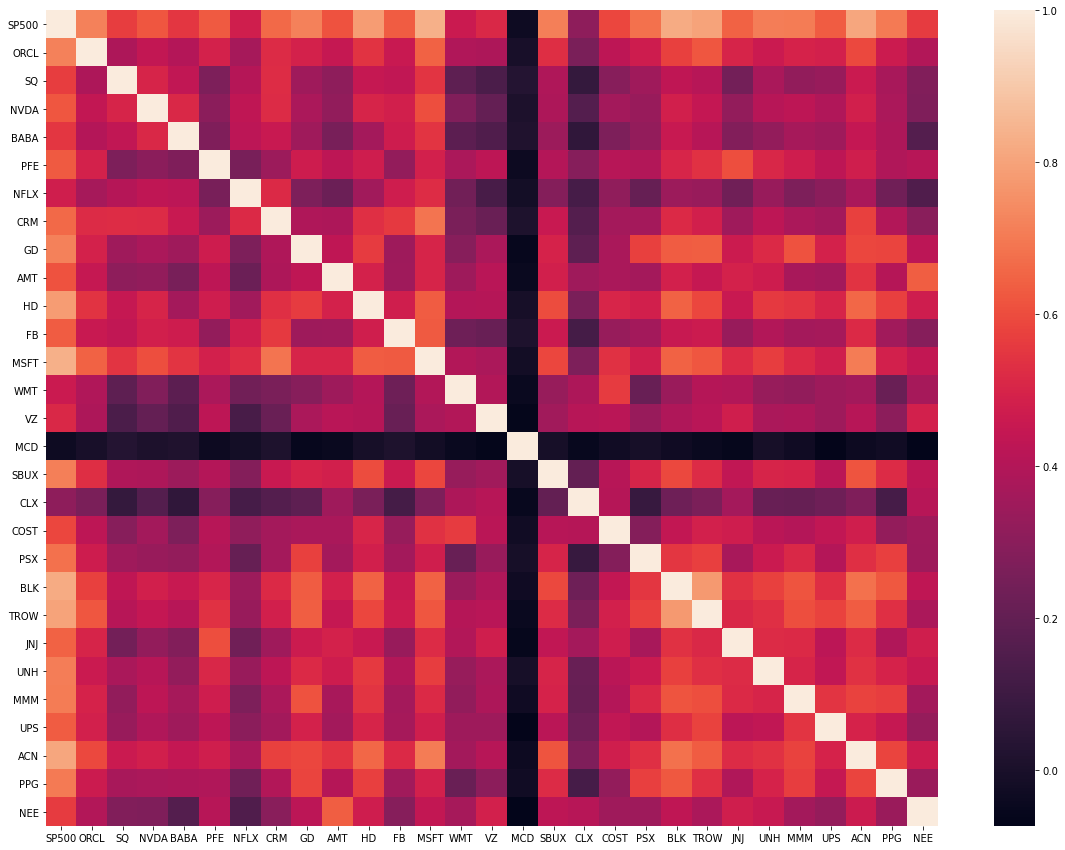

In [33]:
#Visualization of the Correlations

plt.subplots(figsize=(20,15))
sns.heatmap(correlation_of_portfolio);

# Creating a Formula that will help us determine which stocks we will pick in our Portfolio

In [34]:
#Creating a df to compare beta and correlations

raw_beta = {
  "ORCL": ORCL_beta,
  "SQ" : SQ_beta,
  "NVDA": ORCL_beta,
  "BABA": BABA_beta,
  "PFE": PFE_beta,
  "NFLX": NFLX_beta,
  "CRM": CRM_beta,
  "GD": GD_beta,
  "AMT": AMT_beta,
  "HD": HD_beta,
  "FB": FB_beta,
  "MSFT": MSFT_beta,
  "WMT": WMT_beta,
  "VZ": VZ_beta,
  "MCD": MCD_beta,
  "SBUX": SBUX_beta,
  "CLX": CLX_beta,
  "COST": COST_beta,
  "PSX": PSX_beta,
  "BLK": BLK_beta,
  "TROW": TROW_beta,
  "JNJ": JNJ_beta,
  "UNH": UNH_beta,
  "MMM": MMM_beta,
  "UPS": UPS_beta,
  "ACN": ACN_beta,
  "PPG": PPG_beta,
  "NEE": NEE_beta
}
beta_df = pd.DataFrame(list(raw_beta.items()),columns = ['Stock','Beta']) 

beta_df.set_index('Stock', inplace=True)

beta_df.head()

,Beta
Stock,
ORCL,0.976955
SQ,1.573336
NVDA,0.976955
BABA,0.925997
PFE,0.708603


In [35]:
#dropping excess correlations to show only correlation of Portfolio to SP500

correlation_of_portfolio_only_to_SP500 = correlation_of_portfolio.drop(columns=['ORCL','SQ','NVDA','BABA','PFE','NFLX','CRM','GD','AMT','HD','FB','MSFT','WMT', 'VZ','MCD','SBUX','CLX','COST','PSX','BLK','TROW','JNJ','UNH','MMM','UPS','ACN','PPG','NEE'])

correlation_of_portfolio_only_to_SP500.head()

,SP500
SP500,1.000000
ORCL,0.717214
SQ,0.567302
NVDA,0.619705
BABA,0.550555


In [36]:
#combining both df's

correlation_beta_df = pd.concat([beta_df,correlation_of_portfolio_only_to_SP500], axis='columns', join='outer')

correlation_beta_df.head()

,Beta,SP500
ORCL,0.976955,0.717214
SQ,1.573336,0.567302
NVDA,0.976955,0.619705
BABA,0.925997,0.550555
PFE,0.708603,0.630865


In [37]:
#creating our formula to decide how we choose stocks

correlation_beta_df['Beta/SP500'] = correlation_beta_df['Beta']/correlation_beta_df['SP500']

In [38]:
#implementing our formula


correlation_beta_df.dropna(inplace=True)

correlation_beta_df.head()

,Beta,SP500,Beta/SP500
ORCL,0.976955,0.717214,1.362152
SQ,1.573336,0.567302,2.773364
NVDA,0.976955,0.619705,1.576484
BABA,0.925997,0.550555,1.681935
PFE,0.708603,0.630865,1.123225


In [39]:
#Reading the data in ascending order

correlation_beta_df.sort_values('Beta/SP500', ascending=True)

,Beta,SP500,Beta/SP500
MCD,-0.031713,-0.032453,0.977200
VZ,0.517081,0.512857,1.008236
JNJ,0.663617,0.643808,1.030768
COST,0.652210,0.585711,1.113536
PFE,0.708603,0.630865,1.123225
CLX,0.349327,0.309705,1.127936
WMT,0.537768,0.461816,1.164464
NEE,0.677376,0.562373,1.204495
GD,0.916454,0.718211,1.276024
MMM,0.901159,0.705586,1.277179


In [40]:
print(F"From here we decided to use our new formula to pick the stocks with the highest numeric value. We did however take the executive decision to replace 2 stocks PSX with PFE and SBUX with COST. The reason behind this was because we did not believe in the reliability of energy sector and Costco seemed to have better future growth capabilities. Our portfolio consist of the following stocks: AMT, ORCL, PPG, COST, MSFT, UNH, TROW, BLK, NVDA, FB, BABA, CRM, PFE, NFLX, SQ.")

From here we decided to use our new formula to pick the stocks with the highest numeric value. We did however take the executive decision to replace 2 stocks PSX with PFE and SBUX with COST. The reason behind this was because we did not believe in the reliability of energy sector and Costco seemed to have better future growth capabilities. Our portfolio consist of the following stocks: AMT, ORCL, PPG, COST, MSFT, UNH, TROW, BLK, NVDA, FB, BABA, CRM, PFE, NFLX, SQ.


# Analyze the S&P500 with our Final Portfolio Positions

In [41]:
 # Set the file paths for the CSVs 
Combined_portfolio =  Path("../CSVs/combined_close_data_SP500_group_portfolio.csv")


# Read the daily closing prices of MSFT, set the `date` as a datetime index
combined_portfolio_df = pd.read_csv(Combined_portfolio, index_col=0, parse_dates=True, infer_datetime_format=True)

combined_portfolio_df

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
2015-11-19,2081.239990,36.108597,13.070000,30.458263,77.870003,27.049994,120.220001,80.639999,130.626297,99.63,...,92.38,359.09,76.38,102.49,110.63,158.38,104.10,107.28,103.37,100.99
2015-11-20,2089.169922,36.404728,12.850000,30.722525,79.949997,26.957846,123.839996,80.989998,130.896194,100.49,...,91.67,362.46,76.37,102.48,112.97,158.95,104.10,107.97,104.62,101.02
2015-11-23,2086.590088,36.219639,12.120000,30.262524,81.309998,26.245783,125.029999,80.779999,130.077530,99.94,...,92.17,363.25,76.15,102.77,112.16,158.65,103.59,107.84,105.47,100.49
2015-11-24,2089.139893,36.515770,12.020000,30.507206,80.860001,26.781923,123.309998,80.389999,130.923172,99.26,...,93.13,356.81,75.62,102.04,113.19,157.75,103.40,107.35,105.49,99.41
2015-11-25,2088.870117,36.330700,11.900000,30.468054,81.709999,27.535873,124.160004,80.410004,130.608292,99.09,...,92.77,360.62,76.01,101.96,114.41,157.63,103.49,107.10,106.46,98.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,3298.459961,59.799999,157.720001,514.950012,271.089996,36.049999,482.880005,242.740005,138.210007,239.81,...,52.88,547.81,125.22,145.66,302.50,160.27,166.12,214.63,120.25,281.82
2020-09-28,3351.600098,59.580002,160.759995,521.400024,276.010010,36.389999,490.649994,246.669998,140.919998,240.00,...,53.98,558.65,128.55,147.11,303.23,161.66,168.90,222.78,121.74,284.14
2020-09-29,3335.469971,59.470001,164.809998,529.030029,276.929993,36.169998,493.480011,247.449997,138.550003,240.12,...,52.19,554.80,127.49,147.06,304.15,159.81,168.50,224.08,120.33,283.12
2020-09-30,3363.000000,59.700001,162.550003,541.219971,293.980011,36.700001,500.029999,251.320007,138.429993,241.73,...,51.84,563.55,128.22,148.88,311.77,160.18,166.63,225.99,122.08,277.56


In [42]:
daily_returns = combined_portfolio_df.pct_change()
daily_returns.head()

daily_returns.dropna(inplace=True)

daily_returns.head()

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,GD,AMT,...,PSX,BLK,TROW,JNJ,UNH,MMM,UPS,ACN,PPG,NEE
2015-11-20,0.003810,0.008201,-0.016832,0.008676,0.026711,-0.003407,0.030111,0.004340,0.002066,0.008632,...,-0.007686,0.009385,-0.000131,-0.000098,0.021152,0.003599,0.000000,0.006432,0.012092,0.000297
2015-11-23,-0.001235,-0.005084,-0.056809,-0.014973,0.017011,-0.026414,0.009609,-0.002593,-0.006254,-0.005473,...,0.005454,0.002180,-0.002881,0.002830,-0.007170,-0.001887,-0.004899,-0.001204,0.008125,-0.005246
2015-11-24,0.001222,0.008176,-0.008251,0.008085,-0.005534,0.020428,-0.013757,-0.004828,0.006501,-0.006804,...,0.010416,-0.017729,-0.006960,-0.007103,0.009183,-0.005673,-0.001834,-0.004544,0.000190,-0.010747
2015-11-25,-0.000129,-0.005068,-0.009983,-0.001283,0.010512,0.028151,0.006893,0.000249,-0.002405,-0.001713,...,-0.003866,0.010678,0.005157,-0.000784,0.010778,-0.000761,0.000870,-0.002329,0.009195,-0.005331
2015-11-27,0.000594,-0.002038,0.012605,0.008352,-0.004039,-0.002434,0.010309,-0.005472,0.002617,0.005954,...,-0.000108,-0.006184,-0.000789,0.004021,-0.000612,0.002284,0.006667,0.003361,-0.002348,0.004956


In [43]:
# Drop stocks that are not being used in our portfolio
#Keep the following: AMT, ORCL, PPG, COST, MSFT, UNH, TROW, BLK, NVDA, FB, BABA, CRM, PFE, NFLX, SQ

Portfolio_returns= daily_returns.drop(columns=['GD','HD','WMT', 'VZ','MCD','SBUX','CLX','PSX','JNJ','MMM','UPS','ACN','NEE'])

Core_returns= Portfolio_returns

Core_returns

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,AMT,FB,MSFT,COST,BLK,TROW,UNH,PPG
2015-11-20,0.003810,0.008201,-0.016832,0.008676,0.026711,-0.003407,0.030111,0.004340,0.008632,0.009976,0.004635,0.001658,0.009385,-0.000131,0.021152,0.012092
2015-11-23,-0.001235,-0.005084,-0.056809,-0.014973,0.017011,-0.026414,0.009609,-0.002593,-0.005473,-0.003448,0.000000,0.002146,0.002180,-0.002881,-0.007170,0.008125
2015-11-24,0.001222,0.008176,-0.008251,0.008085,-0.005534,0.020428,-0.013757,-0.004828,-0.006804,-0.011314,0.001107,-0.007709,-0.017729,-0.006960,0.009183,0.000190
2015-11-25,-0.000129,-0.005068,-0.009983,-0.001283,0.010512,0.028151,0.006893,0.000249,-0.001713,-0.003121,-0.010323,0.001233,0.010678,0.005157,0.010778,0.009195
2015-11-27,0.000594,-0.002038,0.012605,0.008352,-0.004039,-0.002434,0.010309,-0.005472,0.005954,0.000379,0.004470,0.007328,-0.006184,-0.000789,-0.000612,-0.002348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,0.015977,0.008432,0.035520,0.042578,0.005042,0.008110,0.020715,0.021848,0.015370,0.021200,0.022787,-0.012738,0.023848,0.014502,0.033623,0.010929
2020-09-28,0.016111,-0.003679,0.019275,0.012526,0.018149,0.009431,0.016091,0.016190,0.000792,0.007849,0.007795,0.020550,0.019788,0.026593,0.002413,0.012391
2020-09-29,-0.004813,-0.001846,0.025193,0.014634,0.003333,-0.006046,0.005768,0.003162,0.000500,0.019352,-0.010409,0.007208,-0.006892,-0.008246,0.003034,-0.011582
2020-09-30,0.008254,0.003867,-0.013713,0.023042,0.061568,0.014653,0.013273,0.015640,0.006705,0.000420,0.014812,0.008122,0.015771,0.005726,0.025053,0.014543


In [44]:
correlation_of_final_positions= Core_returns.corr()
correlation_of_final_positions

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,AMT,FB,MSFT,COST,BLK,TROW,UNH,PPG
SP500,1.000000,0.717214,0.567302,0.619705,0.550555,0.630865,0.477013,0.661607,0.610404,0.632176,0.835836,0.585711,0.820446,0.800011,0.708231,0.698629
ORCL,0.717214,1.000000,0.386958,0.440505,0.401409,0.489646,0.368666,0.519628,0.449295,0.457322,0.646769,0.426380,0.574767,0.618554,0.462337,0.465708
SQ,0.567302,0.386958,1.000000,0.497670,0.435255,0.266798,0.406967,0.522806,0.308892,0.436800,0.543734,0.292254,0.431933,0.409616,0.378167,0.371528
NVDA,0.619705,0.440505,0.497670,1.000000,0.511204,0.302971,0.432834,0.518064,0.317262,0.483370,0.605723,0.358869,0.480509,0.446315,0.409963,0.381751
BABA,0.550555,0.401409,0.435255,0.511204,1.000000,0.271929,0.424142,0.459182,0.256468,0.471006,0.543635,0.267241,0.454519,0.411006,0.322509,0.386716
PFE,0.630865,0.489646,0.266798,0.302971,0.271929,1.000000,0.255231,0.343271,0.426877,0.324569,0.485601,0.412793,0.505123,0.535580,0.505540,0.394458
NFLX,0.477013,0.368666,0.406967,0.432834,0.424142,0.255231,1.000000,0.517518,0.224412,0.472848,0.524701,0.312532,0.343955,0.336051,0.337498,0.236955
CRM,0.661607,0.519628,0.522806,0.518064,0.459182,0.343271,0.517518,1.000000,0.385774,0.559551,0.689552,0.362922,0.517619,0.482899,0.426561,0.397626
AMT,0.610404,0.449295,0.308892,0.317262,0.256468,0.426877,0.224412,0.385774,1.000000,0.354050,0.499342,0.375531,0.487550,0.449716,0.469692,0.405584
FB,0.632176,0.457322,0.436800,0.483370,0.471006,0.324569,0.472848,0.559551,0.354050,1.000000,0.629071,0.333109,0.452998,0.463954,0.396961,0.355863


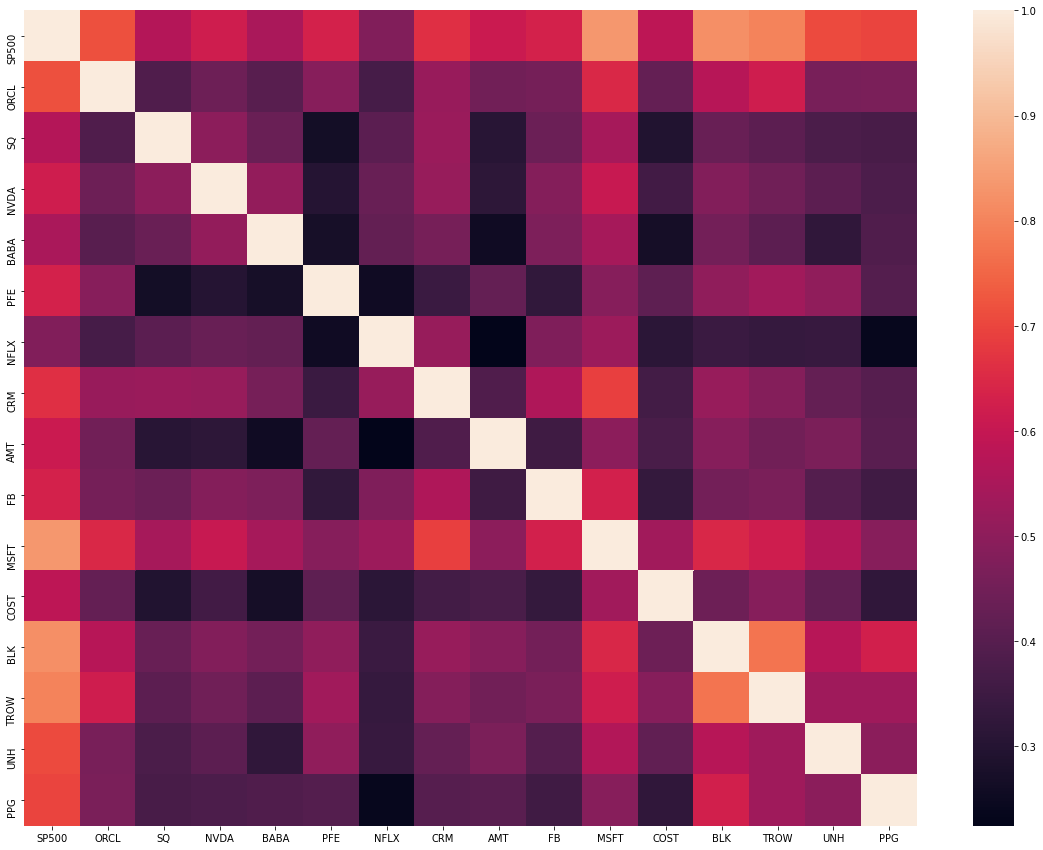

In [45]:
#Visualization of the Correlations

plt.subplots(figsize=(20,15))
sns.heatmap(correlation_of_final_positions);

In [46]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.40,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,]
core_portfolio_returns = Core_returns.dot(weights)
core_portfolio_returns.head()

2015-11-20    0.006532
2015-11-23   -0.003925
2015-11-24   -0.000940
2015-11-25    0.002003
2015-11-27    0.001257
dtype: float64

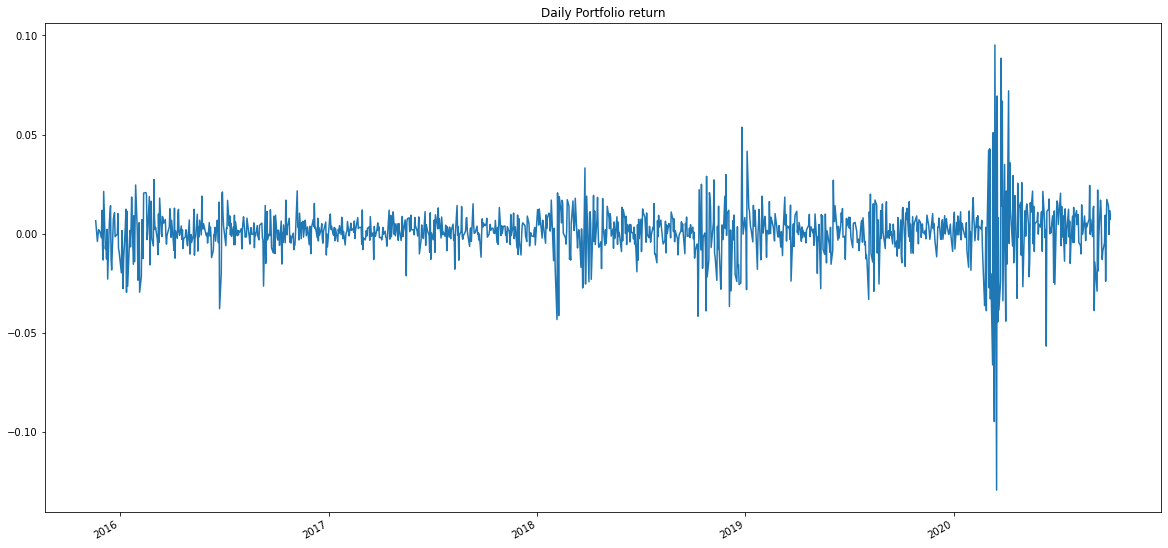

In [47]:
 # plot the daily portfolio returns
core_portfolio_returns.plot(figsize=(20,10), title="Daily Portfolio return"); 

In [48]:
# Calculating Cumulative Product
core_cumulative_returns = (1 + core_portfolio_returns).cumprod() - 1
core_cumulative_returns

2015-11-20    0.006532
2015-11-23    0.002581
2015-11-24    0.001639
2015-11-25    0.003645
2015-11-27    0.004906
                ...   
2020-09-25    1.474158
2020-09-28    1.508525
2020-09-29    1.507425
2020-09-30    1.536714
2020-10-01    1.555398
Length: 1224, dtype: float64

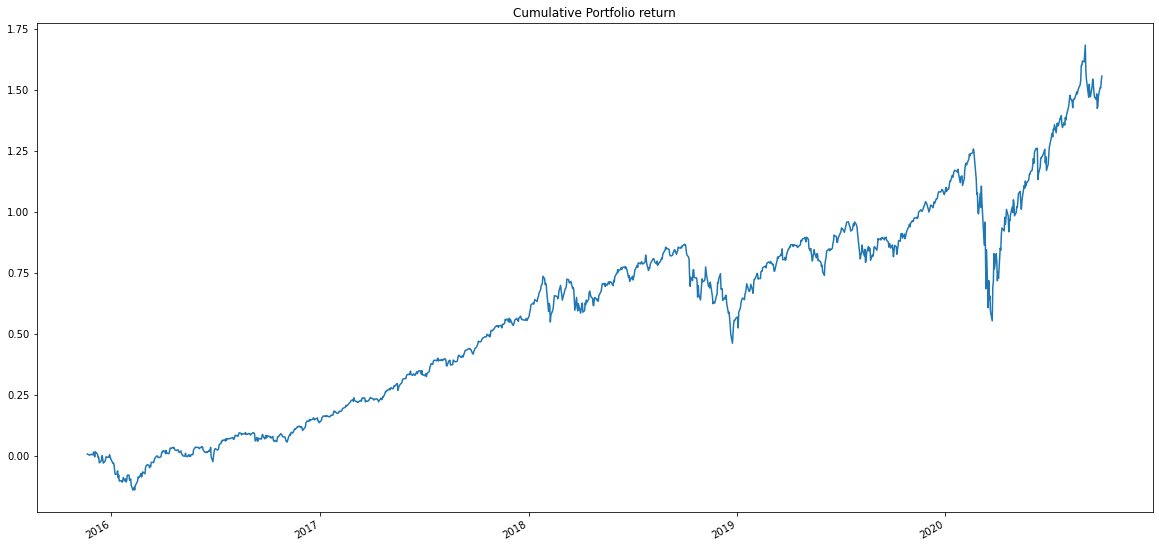

In [49]:
core_cumulative_returns.plot(figsize=(20,10), title="Cumulative Portfolio return");

In [50]:
#SP500 daily returns

SP500_daily_returns= Core_returns.drop(columns=['AMT', 'ORCL', 'PPG', 'COST', 'MSFT', 'UNH', 'TROW', 'BLK', 'NVDA', 'FB', 'BABA', 'CRM', 'PFE', 'NFLX', 'SQ'])

SP500_daily_returns

,SP500
2015-11-20,0.003810
2015-11-23,-0.001235
2015-11-24,0.001222
2015-11-25,-0.000129
2015-11-27,0.000594
...,...
2020-09-25,0.015977
2020-09-28,0.016111
2020-09-29,-0.004813
2020-09-30,0.008254


In [51]:
# Calculating Cumulative Product for SP500
Sp500_cumulative_returns = (1 + SP500_daily_returns).cumprod() - 1
Sp500_cumulative_returns

,SP500
2015-11-20,0.003810
2015-11-23,0.002571
2015-11-24,0.003796
2015-11-25,0.003666
2015-11-27,0.004262
...,...
2020-09-25,0.584853
2020-09-28,0.610386
2020-09-29,0.602636
2020-09-30,0.615864


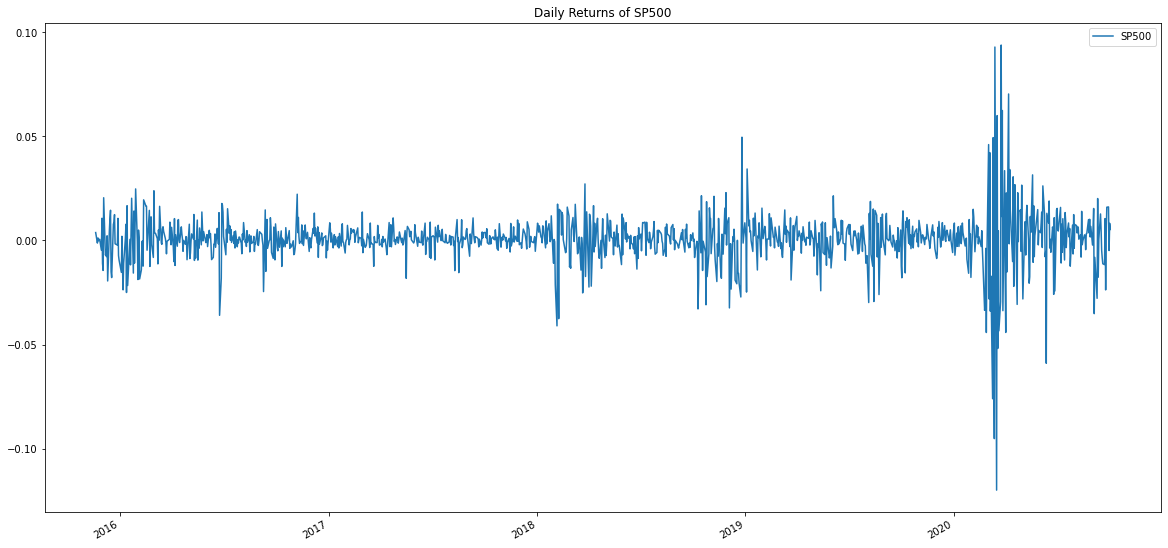

In [52]:
SP500_daily_returns.plot(figsize=(20,10), title="Daily Returns of SP500");

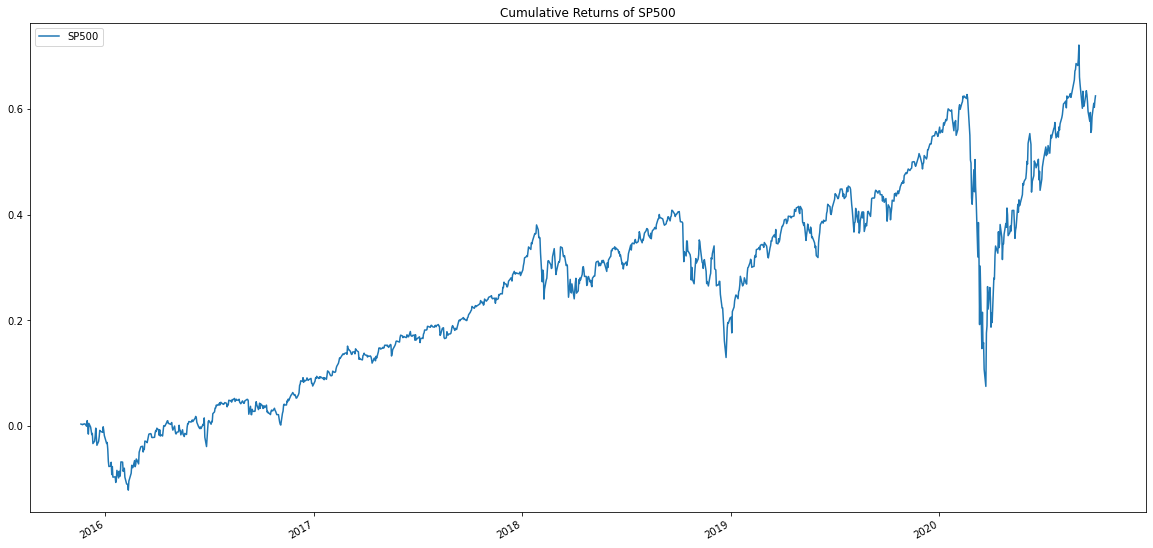

In [53]:
Sp500_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of SP500");

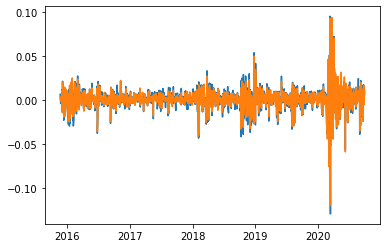

In [54]:
plt.plot(core_portfolio_returns)
plt.plot(SP500_daily_returns)
plt.show()

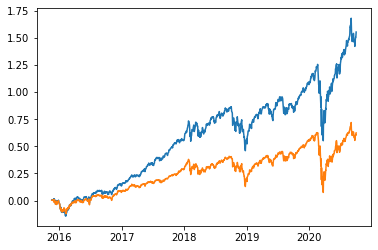

In [55]:
plt.plot(core_cumulative_returns)
plt.plot(Sp500_cumulative_returns)
plt.show()

In [56]:
#calculate Std Dev of Portfolio

print(core_portfolio_returns.std())
print(core_portfolio_returns.mean())

print(SP500_daily_returns.std())
print(SP500_daily_returns.mean())

0.013021605893950699
0.0008521218194888947
SP500    0.01216
dtype: float64
SP500    0.000471
dtype: float64


In [57]:
sharpe_ratios = (core_portfolio_returns.mean() * 252) / (core_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

1.0388130801041227

In [58]:
portfolio_5yrs = combined_portfolio_df.drop(columns=['MCD', 'VZ', 'JNJ', 'CLX', 'WMT', 'NEE', 'GD', 'MMM', 'ACN', 'UPS', 'HD', 'SBUX', 'PSX'])
portfolio_5yrs

,SP500,ORCL,SQ,NVDA,BABA,PFE,NFLX,CRM,AMT,FB,MSFT,COST,BLK,TROW,UNH,PPG
2015-11-19,2081.239990,36.108597,13.070000,30.458263,77.870003,27.049994,120.220001,80.639999,99.63,106.26,53.94,162.83,359.09,76.38,110.63,103.37
2015-11-20,2089.169922,36.404728,12.850000,30.722525,79.949997,26.957846,123.839996,80.989998,100.49,107.32,54.19,163.10,362.46,76.37,112.97,104.62
2015-11-23,2086.590088,36.219639,12.120000,30.262524,81.309998,26.245783,125.029999,80.779999,99.94,106.95,54.19,163.45,363.25,76.15,112.16,105.47
2015-11-24,2089.139893,36.515770,12.020000,30.507206,80.860001,26.781923,123.309998,80.389999,99.26,105.74,54.25,162.19,356.81,75.62,113.19,105.49
2015-11-25,2088.870117,36.330700,11.900000,30.468054,81.709999,27.535873,124.160004,80.410004,99.09,105.41,53.69,162.39,360.62,76.01,114.41,106.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,3298.459961,59.799999,157.720001,514.950012,271.089996,36.049999,482.880005,242.740005,239.81,254.82,207.82,342.58,547.81,125.22,302.50,120.25
2020-09-28,3351.600098,59.580002,160.759995,521.400024,276.010010,36.389999,490.649994,246.669998,240.00,256.82,209.44,349.62,558.65,128.55,303.23,121.74
2020-09-29,3335.469971,59.470001,164.809998,529.030029,276.929993,36.169998,493.480011,247.449997,240.12,261.79,207.26,352.14,554.80,127.49,304.15,120.33
2020-09-30,3363.000000,59.700001,162.550003,541.219971,293.980011,36.700001,500.029999,251.320007,241.73,261.90,210.33,355.00,563.55,128.22,311.77,122.08


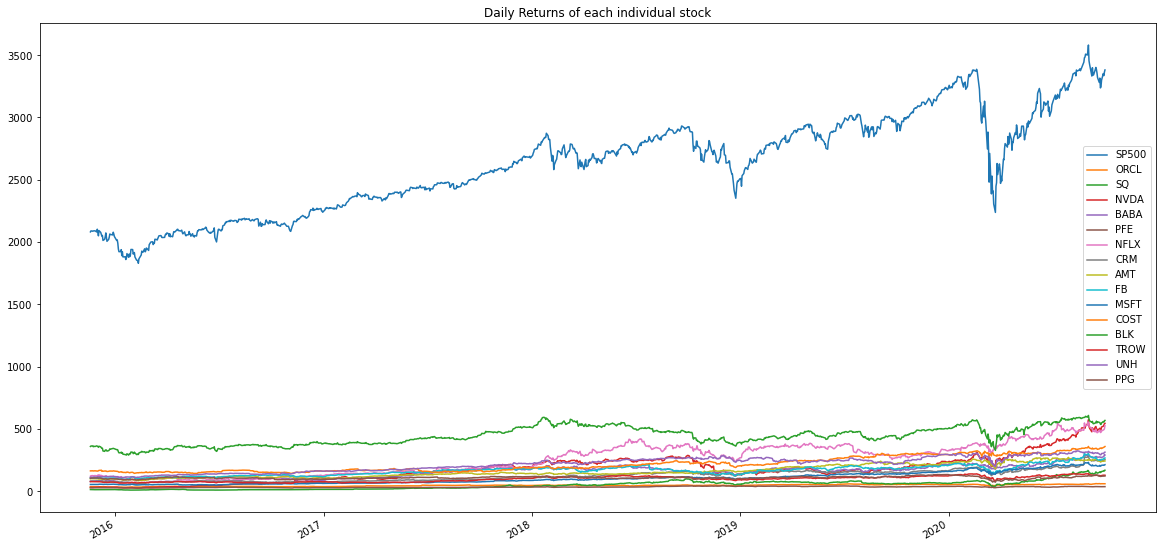

In [59]:
portfolio_5yrs.plot(title='Daily Returns of each individual stock', figsize=(20,10));

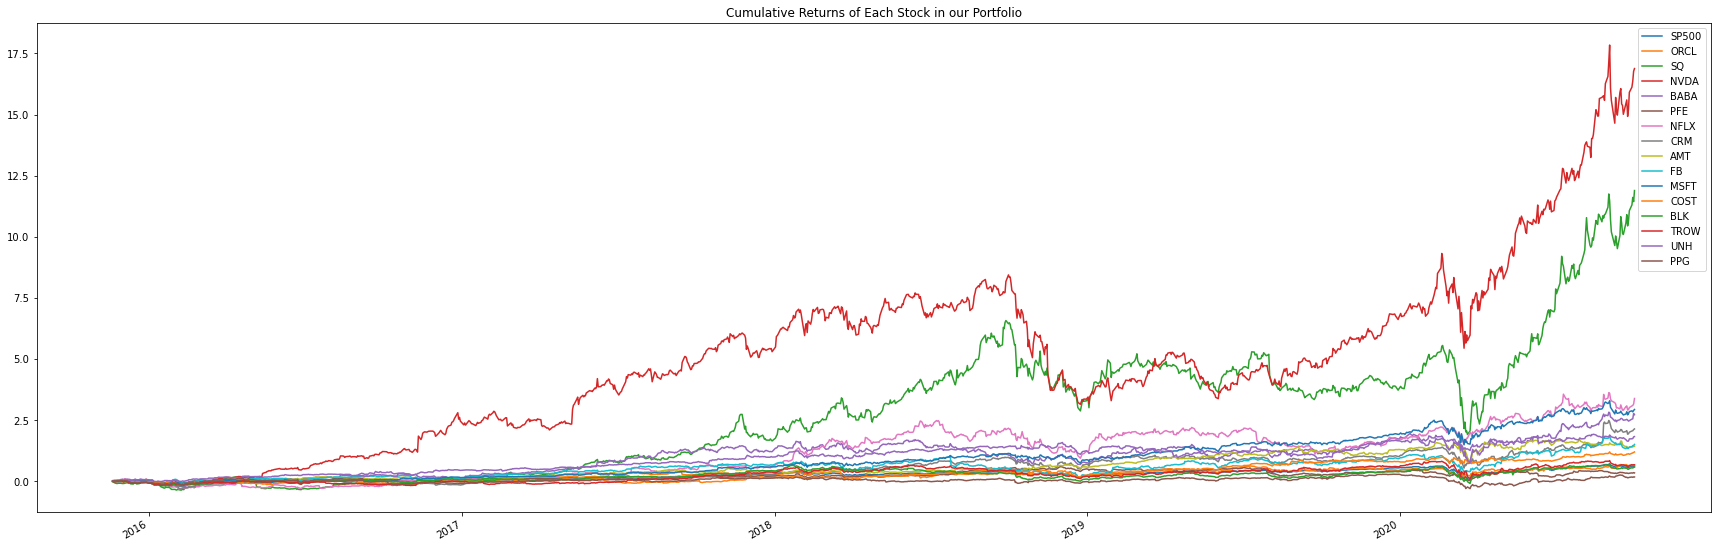

In [60]:
portfolio_5yrs_daily = portfolio_5yrs.pct_change()
portfolio_5yrs_1 = (1 + portfolio_5yrs_daily).cumprod() - 1
portfolio_5yrs_1.plot(figsize=(30,10), title='Cumulative Returns of Each Stock in our Portfolio');

# Predict the Direction of the Portfolio compared to the S&P500 Using Monte Carlo Simulation

## Monte Carlo Simulation of the Portfolio

In [61]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [62]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2015-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ['SPY','AMT','ORCL','PPG','COST','MSFT','UNH','TROW','BLK','NVDA','FB','BABA','CRM','PFE','NFLX','SQ']

# Get 5 years of past data of portfolios
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index = df_ticker.index.date
df_ticker.head()
df_ticker.to_csv('df_ticker.csv') 

In [63]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.40,0.04,0.04,0.04],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [64]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AMT                                                  BABA  \
              open    high    low   close     volume daily_return   open   
2015-11-19   99.87  100.26  99.22   99.62  1223026.0          NaN  78.06   
2015-11-20  100.20  100.87  99.53  100.47  1023837.0     0.008532  78.44   
2015-11-23  100.49  100.67  99.45   99.93   755145.0    -0.005375  80.45   
2015-11-24   99.28   99.45  98.32   99.27  1054663.0    -0.006605  80.85   
2015-11-25   99.15   99.60  98.90   99.07   622603.0    -0.002015  80.91   

                                    ...     TROW                              \
              high     low   close  ...      low  close  volume daily_return   
2015-11-19  79.150  77.403  77.910  ...  76.0100  76.38  521700          NaN   
2015-11-20  80.785  78.400  79.965  ...  75.9100  76.38  671459     0.000000   
2015-11-23  82.190  79.970  81.310  ...  76.0200  76.15  425575    -0.003011   
2015-11-24  81.110  79.270  80.790  ...  74.9701  75.63  593463    -0.006829   
2015-11-25  82.675  80.820  81.630  ...  75.3400  76.01  631376     0.005024   

               UNH                                                   
              open    high     low   close      volume daily_return  
2015-11-19  109.74  113.71  109.61  110.61  13240076.0          NaN  
2015-11-20  111.01  114.44  110.60  113.00   5609101.0     0.021607  
2015-11-23  112.97  114.49  112.10  112.15   3006888.0    -0.007522  
2015-11-24  111.70  113.45  111.06  113.23   2363542.0     0.009630  
2015-11-25  113.47  115.05  113.00  114.42   2408146.0     0.010510  

[5 rows x 96 columns]

In [65]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988906,0.992738,1.004556,0.999826,1.019771,1.007745,1.007251,0.998771,1.004968,1.000143,...,0.999099,1.002478,0.995256,1.003035,0.999229,1.002819,0.997936,1.000725,1.004905,1.009358
2,1.000231,0.983574,1.007855,0.992816,1.021925,1.011343,1.012067,0.990642,1.003769,1.006738,...,0.987214,0.998806,0.986071,1.003211,1.006305,1.008104,1.001064,1.010572,1.001237,1.002946
3,1.010592,0.977863,1.009138,0.990491,1.025458,1.010544,1.008247,0.983712,1.013359,1.004604,...,0.987479,1.002671,0.980681,1.003311,1.003199,1.011846,0.996115,1.008727,1.000527,1.006174
4,1.005319,0.980648,1.010839,0.977525,1.029364,1.006141,1.010913,0.974858,1.008486,1.018001,...,0.988055,1.001119,0.972495,1.016748,1.006018,1.017986,0.998785,0.997503,1.009362,1.006961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.681510,2.714074,3.129739,2.122219,2.211689,3.108551,2.366765,2.301400,3.123605,2.943667,...,2.845321,2.521428,2.972285,1.826912,2.237883,2.767765,3.514696,2.809148,2.941521,2.422336
1257,2.665012,2.701744,3.128599,2.123213,2.219305,3.114594,2.361819,2.298613,3.133656,2.939636,...,2.860250,2.529545,2.950719,1.819020,2.245103,2.786420,3.526299,2.812569,2.947462,2.421209
1258,2.651200,2.710310,3.150072,2.121996,2.215572,3.138387,2.374203,2.287730,3.157144,2.943312,...,2.845241,2.543793,2.960243,1.791609,2.261302,2.782278,3.539779,2.814054,2.964892,2.422563
1259,2.636045,2.707250,3.200067,2.132133,2.214408,3.120123,2.385360,2.304294,3.170685,2.928730,...,2.846437,2.534774,2.936721,1.801300,2.280655,2.779005,3.584346,2.814123,2.979713,2.419751


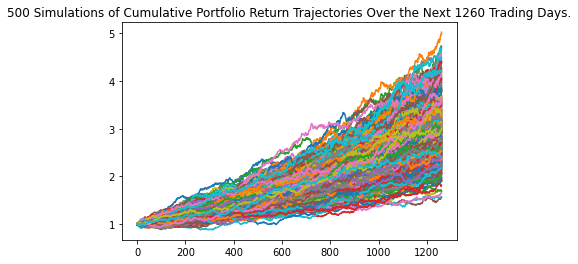

In [66]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MonteCarlo_5yrs_simulation2.png", bbox_inches="tight")

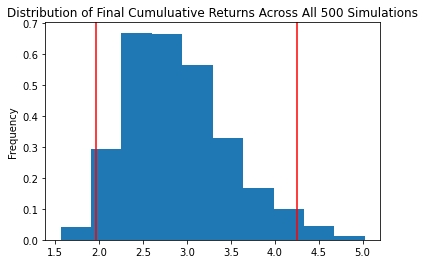

In [67]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MonteCarlo_5yrs_distribution2.png',bbox_inches='tight')

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              2.895847
std               0.589691
min               1.559500
25%               2.454324
50%               2.821701
75%               3.213398
max               5.025064
95% CI Lower      1.962128
95% CI Upper      4.251050
Name: 1260, dtype: float64


In [69]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(summary[8]*10000,2)
ci_upper = round(summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $19621.28 and $42510.5


## MC Simulation for SP500

In [73]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2015-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers_1 = ['SPY']

# Get 5 years of past data of portfolios
df_ticker_1 = api.get_barset(
    tickers_1,
    timeframe,
    start=start_date,
    end=end_date
).df

In [74]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear_SP500 = MCSimulation(
    portfolio_data = df_ticker_1,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [75]:
MC_fiveyear_SP500.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.025240,0.994252,1.007339,1.003842,1.004661,1.008039,1.036028,1.013963,1.002222,0.996770,...,0.995528,1.005848,0.985447,0.997863,0.981917,1.013414,0.982056,1.005776,1.002863,0.990597
2,1.024945,0.984344,1.010838,0.995444,0.995019,1.016381,1.035466,1.010888,0.992452,1.008830,...,0.986330,1.007578,0.980687,0.998295,0.990599,1.013282,0.973854,1.001831,1.001632,0.982155
3,1.027859,0.980948,1.039085,0.996435,0.955176,0.994890,1.044883,1.030342,0.972230,1.028340,...,0.993112,1.019181,0.959235,0.982823,0.992815,1.007659,0.991818,0.986791,1.005348,0.989735
4,1.021238,0.966043,1.033850,0.998911,0.959645,1.000255,1.039067,1.029801,0.976492,1.034202,...,0.957550,0.984955,0.993781,0.995342,1.013567,1.005497,0.963260,0.986859,1.006260,0.985543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.136824,1.059739,2.862749,1.536394,1.194695,2.131216,1.302284,2.044508,1.669651,2.288847,...,2.746951,2.354714,1.347568,2.210135,1.177048,1.150474,1.136106,2.906233,2.233422,2.000418
1257,1.129375,1.059733,2.876605,1.540728,1.223460,2.169137,1.282259,2.036708,1.662069,2.253778,...,2.817576,2.356364,1.360087,2.222015,1.183206,1.164707,1.160896,2.934053,2.262686,1.966814
1258,1.133101,1.057730,2.977346,1.569488,1.232280,2.185914,1.285174,2.009118,1.643810,2.267049,...,2.809375,2.398208,1.369752,2.212873,1.167419,1.177250,1.153452,2.930655,2.268406,1.995717
1259,1.146316,1.068511,3.005279,1.582927,1.218385,2.168386,1.297530,1.999931,1.633240,2.254467,...,2.859423,2.401145,1.371379,2.225695,1.164316,1.166739,1.155447,2.871105,2.266229,2.023097


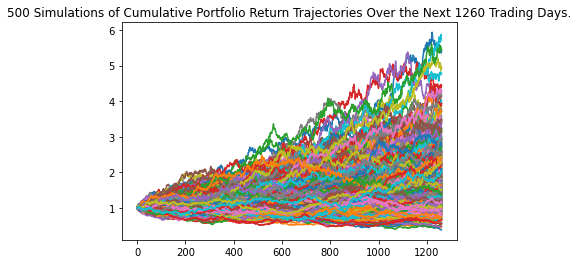

In [76]:
line_plot = MC_fiveyear_SP500.plot_simulation()
line_plot.get_figure().savefig("MonteCarlo_5yrs_SPY_simulation.png", bbox_inches="tight")

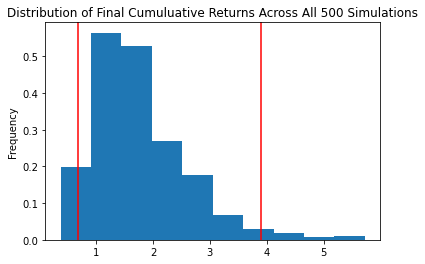

In [77]:
dist_plot = MC_fiveyear_SP500.plot_distribution()
line_plot.get_figure().savefig("MonteCarlo_5yrs_SPY_dist.png", bbox_inches="tight")

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              2.895847
std               0.589691
min               1.559500
25%               2.454324
50%               2.821701
75%               3.213398
max               5.025064
95% CI Lower      1.962128
95% CI Upper      4.251050
Name: 1260, dtype: float64


In [79]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(summary[8]*10000,2)
ci_upper = round(summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $19621.28 and $42510.5
